In [1]:
import nltk
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
import json

In [247]:
with open('data_eyes.json', 'r') as f:
    data = json.load(f)

# Membuat DataFrame dari data intents
df = pd.DataFrame(data['intents'])

# Membuat dictionary untuk menyimpan data yang akan diubah ke DataFrame
dic = {"tag": [], "patterns": [], "responses": []}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

# Membuat DataFrame baru dari dictionary
df = pd.DataFrame.from_dict(dic)
df.head(50)


,tag,patterns,responses
0,notfound,,"[Maaf tidak tahu, saya tidak tahu, kata diluar..."
1,notfound,,"[Maaf tidak tahu, saya tidak tahu, kata diluar..."
2,notfound,,"[Maaf tidak tahu, saya tidak tahu, kata diluar..."
3,notfound,,"[Maaf tidak tahu, saya tidak tahu, kata diluar..."
4,notfound,,"[Maaf tidak tahu, saya tidak tahu, kata diluar..."
5,sapaan,Halo,"[Halo, ada yang bisa saya bantu?, Hai, ada yan..."
6,sapaan,Hai,"[Halo, ada yang bisa saya bantu?, Hai, ada yan..."
7,sapaan,Selamat pagi,"[Halo, ada yang bisa saya bantu?, Hai, ada yan..."
8,sapaan,Selamat siang,"[Halo, ada yang bisa saya bantu?, Hai, ada yan..."
9,sapaan,Selamat sore,"[Halo, ada yang bisa saya bantu?, Hai, ada yan..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        335 non-null    object
 1   patterns   335 non-null    object
 2   responses  335 non-null    object
dtypes: object(3)
memory usage: 8.0+ KB


In [123]:
from nltk.stem import PorterStemmer
import string
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    words = word_tokenize(text)

    # Melakukan stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

     # Menghapus stopwords
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # Menggabungkan kata-kata kembali ke dalam teks
    processed_text = ' '.join(words)

    return processed_text

In [124]:
# Mengubah elemen dalam kolom 'tag' dari list menjadi string
if 'tag' in df.columns:
    df['tag'] = df['tag'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Menampilkan hasil
df.tail(10)


,tag,patterns,responses
325,tidak,tidak,"[baiklah, silahkan datang apabila ada pertanya..."
326,tidak,ga ada,"[baiklah, silahkan datang apabila ada pertanya..."
327,tidak,bye,"[baiklah, silahkan datang apabila ada pertanya..."
328,tidak,googbye,"[baiklah, silahkan datang apabila ada pertanya..."
329,tidak,oke cukup,"[baiklah, silahkan datang apabila ada pertanya..."
330,tidak,tidak ada,"[baiklah, silahkan datang apabila ada pertanya..."
331,tidak,ga ada pertanyaan lagi,"[baiklah, silahkan datang apabila ada pertanya..."
332,tidak,ga ada,"[baiklah, silahkan datang apabila ada pertanya..."
333,tidak,ga ada terima kasih,"[baiklah, silahkan datang apabila ada pertanya..."
334,tidak,tidak ada teri makasih,"[baiklah, silahkan datang apabila ada pertanya..."


In [220]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.patterns.apply(preprocess_text)
y = df.tag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Transform teks menjadi urutan angka
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding agar panjang sekuens sama
X_train = pad_sequences(X_train, maxlen=20)
X_test = pad_sequences(X_test, maxlen=20)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Jumlah kata unik (input_dim untuk Embedding layer)
input_dim = len(tokenizer.word_index) + 1

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((268, 20), (268,), (67, 20), (67,))

In [246]:
series = pd.Series(y_train)
series.value_counts()

64    20
69    15
71     8
30     7
53     6
21     5
52     5
4      4
58     4
57     4
62     4
61     4
11     4
74     4
14     4
27     4
42     4
0      4
15     4
70     4
24     4
40     4
1      4
16     4
22     4
49     4
67     4
68     4
54     4
51     4
29     4
33     4
43     4
41     3
32     3
47     3
12     3
13     3
20     3
25     3
17     3
59     3
55     3
50     3
56     3
8      3
44     3
45     3
48     3
35     2
6      2
63     2
66     2
31     2
7      2
65     2
75     2
18     2
73     2
19     2
23     2
38     2
39     2
36     2
37     2
60     2
3      2
26     2
2      2
9      2
5      2
28     2
10     1
72     1
34     1
46     1
Name: count, dtype: int64

In [221]:
input_dim # jumlah kata unik setelah tokenisasi

233

In [222]:
sequence_lengths_train = [len(seq) for seq in X_train]
sequence_lengths_test = [len(seq) for seq in X_test]

sequence_lengths = sequence_lengths_train + sequence_lengths_test
max(sequence_lengths)

20

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Activation, LayerNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model = Sequential([
        Embedding(input_dim=input_dim, output_dim=128),

        Bidirectional(LSTM(128, return_sequences=True)),
        Bidirectional(LSTM(128, return_sequences=False)),

        Dense(len(label_encoder.classes_), activation='softmax')
    ])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_98 (Embedding)    (None, None, 128)         29824     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_109 (Dense)           (None, 76)                19532     
                                                                 
Total params: 706,764
Trainable params: 706,764
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
34/34 [============================

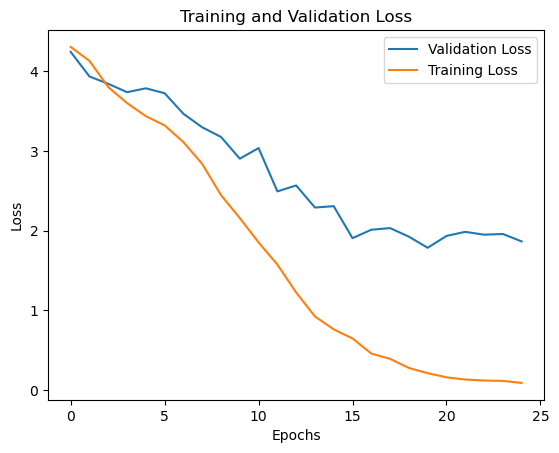

In [251]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [252]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model - Loss: {loss}, Accuracy: {accuracy}")

3/3 [==============================] - 0s 19ms/step - loss: 1.7853 - accuracy: 0.4925
Model - Loss: 1.785285472869873, Accuracy: 0.49253731966018677


In [253]:
# Prediksi contoh data
example_texts = ["Bisakah katarak menyebabkan kebutaan?", "Bagaimana glaukoma terdiagnosis?", 'halo selamat pagi']

# Tokenisasi dan preprocessing teks
example_sequences = [word_tokenize(preprocess_text(text)) for text in example_texts]

# Konversi ke angka (contoh dummy)
word_index = {word: idx for idx, word in enumerate(set(word for seq in example_sequences for word in seq), 1)}
example_padded = pad_sequences([[word_index.get(word, 0) for word in seq] for seq in example_sequences], maxlen=20, padding='post')

# Prediksi
predictions = model.predict(example_padded)
for idx, pred in enumerate(predictions):
    predicted_class = np.argmax(pred)
    sorted_indices = np.argsort(pred)[::-1]  # Mengurutkan indeks berdasarkan probabilitas secara descending
    sorted_probabilities = {f"Class {i}": pred[i] for i in sorted_indices}
    print(f"Example {idx + 1}: '{example_texts[idx]}' -> Predicted Class: {predicted_class}")
    print(f"Class Probabilities (sorted): {sorted_probabilities}")

1/1 [==============================] - 2s 2s/step
Example 1: 'Bisakah katarak menyebabkan kebutaan?' -> Predicted Class: 69
Class Probabilities (sorted): {'Class 69': 0.83546954, 'Class 49': 0.09263525, 'Class 64': 0.040785972, 'Class 71': 0.010906625, 'Class 21': 0.0055910256, 'Class 22': 0.0051448788, 'Class 53': 0.0017873051, 'Class 16': 0.0017291999, 'Class 0': 0.0012239579, 'Class 24': 0.0011815263, 'Class 20': 0.0006365768, 'Class 67': 0.0003748995, 'Class 30': 0.00033739815, 'Class 14': 0.0002975531, 'Class 43': 0.00026513287, 'Class 11': 0.00021663362, 'Class 73': 0.00013007398, 'Class 52': 0.00012221685, 'Class 33': 0.00010253259, 'Class 13': 8.305148e-05, 'Class 62': 6.834281e-05, 'Class 57': 6.824003e-05, 'Class 26': 5.8475707e-05, 'Class 32': 5.617658e-05, 'Class 28': 5.4718315e-05, 'Class 75': 4.9450857e-05, 'Class 68': 4.552087e-05, 'Class 4': 3.6695e-05, 'Class 6': 3.6543366e-05, 'Class 70': 2.9166908e-05, 'Class 12': 2.9116994e-05, 'Class 15': 2.8176517e-05, 'Class 40':